<a href="https://colab.research.google.com/github/Gayathrisabareesh/Final-project/blob/main/Copy_of_Model_Customer_Conversion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
#Importing the Csv files
Data = pd.read_csv("https://raw.githubusercontent.com/Gayathrisabareesh/Final-project/main/Customer%20Conversion%20Prediction%20-%20Customer%20Conversion%20Prediction.csv")

In [ ]:
#Importing top 5 Data
Data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
#Getting the rows and columns
Data.shape

(45211, 11)

In [ ]:
#Getting the basic information about data
Data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
#Getting to know the Null values in the data.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
#there is no null values in the data
Data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
#Columns names-Features
Data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
Feature = ['age', 'job', 'marital', 'education_qual', 'call_type', 'mon', 'day', 'prev_outcome']

In [ ]:
#Converting the categorical values into the numerical value
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
#Getting the Unique value
Data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
Data["marital"] = label_encoder.fit_transform(Data["marital"])
Data["marital"].unique()

array([1, 2, 0])

In [ ]:
Data.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
Data["education_qual"] = label_encoder.fit_transform(Data["education_qual"])
Data["education_qual"].unique()

array([2, 1, 3, 0])

In [ ]:
Data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
Data["job"] = label_encoder.fit_transform(Data["job"])
Data["job"].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [ ]:
#Changing the Yes has 2 and no has 0
Data["y"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
Data['y'] = Data['y'].map({'no': 0, 'yes': 1})

In [ ]:
Data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,4,1,2,unknown,5,may,261,1,unknown,0
1,44,9,2,1,unknown,5,may,151,1,unknown,0
2,33,2,1,1,unknown,5,may,76,1,unknown,0
3,47,1,1,3,unknown,5,may,92,1,unknown,0
4,33,11,2,3,unknown,5,may,198,1,unknown,0


In [ ]:
#Previous outcome column has more unknown value,so we are dropping that
Data.drop("prev_outcome",  axis = 1, inplace = True)

In [ ]:
Data.drop("day",  axis = 1, inplace = True)

In [ ]:
Data.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,y
0,58,4,1,2,unknown,may,261,1,0
1,44,9,2,1,unknown,may,151,1,0
2,33,2,1,1,unknown,may,76,1,0
3,47,1,1,3,unknown,may,92,1,0
4,33,11,2,3,unknown,may,198,1,0


In [ ]:
Data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
Data["call_type"] = label_encoder.fit_transform(Data["call_type"])

In [ ]:
Data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
Data.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
Data["mon"] = label_encoder.fit_transform(Data["mon"])

In [ ]:
Data.mon.unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [ ]:
Data.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,y
0,58,4,1,2,2,8,261,1,0
1,44,9,2,1,2,8,151,1,0
2,33,2,1,1,2,8,76,1,0
3,47,1,1,3,2,8,92,1,0
4,33,11,2,3,2,8,198,1,0


In [ ]:
Data.tail()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,y
45206,51,9,1,2,0,9,977,3,1
45207,71,5,0,0,0,9,456,2,1
45208,72,5,1,1,0,9,1127,5,1
45209,57,1,1,1,1,9,508,4,0
45210,37,2,1,1,0,9,361,2,0


In [ ]:
#Splitting the feature vaue has x and target value has y
X = Data.drop("y", axis = 1)
Y = Data["y"]

In [ ]:
#Test train and splitting the data
X_Train, X_Test, Y_Train, Y_Test =  train_test_split(X,Y, test_size = 0.2, random_state = 42) 

In [ ]:
#Doing standard scalar for scaling up the values,(i.e)data has not standard,if the data has too much off differences usig the standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [ ]:
#Implementing the Logic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
Result = model.fit (X_Train, Y_Train)

In [ ]:
from sklearn.metrics import confusion_matrix
Y_Pred = Result.predict(X_Test)
CM = confusion_matrix(Y_Test, Y_Pred)
CM

array([[7811,  141],
       [ 887,  204]])

Text(33.0, 0.5, 'Truth')

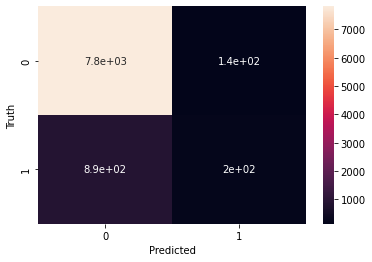

In [ ]:
#Visualize the confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
Result.score(X_Test, Y_Test)

0.8863209112020347

In [ ]:
Result.predict([[51,	9,	1,	2,	0,	9,	977,	3]])

array([1])

In [ ]:
X_Knn = Data.drop("y", axis = 1)
Y_Knn = Data["y"]

In [ ]:
X_train_Knn, X_test_Knn, Y_train_Knn, Y_test_Knn =  train_test_split(X_Knn,Y_Knn, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_Knn = sc.fit_transform(X_train_Knn)
X_test_Knn = sc.transform(X_test_Knn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
Res = knn.fit(X_train_Knn, Y_train_Knn)

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred_Knn = Res.predict(X_test_Knn)
CM = confusion_matrix(Y_test_Knn, Y_pred_Knn)
CM

array([[7691,  261],
       [ 790,  301]])

In [ ]:
Res.score(X_test_Knn, Y_test_Knn)

0.883777507464337

In [ ]:
X_ran = Data.drop("y", axis = 1)
Y_ran = Data["y"]

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(X_ran,Y_ran, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, random_state=42)
Res = RF.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = Result.predict(X_test)
CM = confusion_matrix(Y_test, Y_pred)
CM

array([[7811,  141],
       [ 887,  204]])

In [ ]:
#Compare to all Random forest get more accuracy
Result.score(X_test, Y_test)

0.8863209112020347